<a href="https://colab.research.google.com/github/brunobf09/Google_Flight/blob/main/%5BARTIGO%5D_Google_Flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Web Scraping + Google Flights**
##A combinação perfeita para suas férias

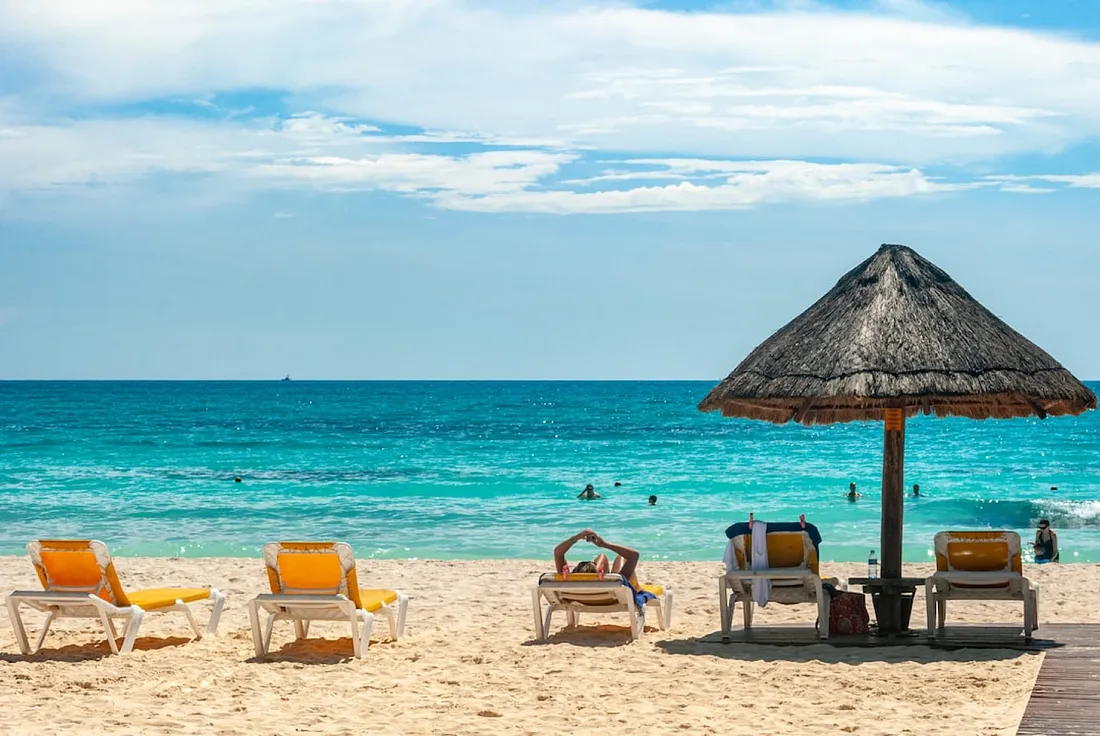

Encontrar passagens baratas na internet pode ser difícil devido à variação de preços conforme a demanda, a rota escolhida e a flexibilidade nas datas. Promoções e comparações de preços podem ajudar, mas é necessário pesquisar em várias fontes.

O Web Scraping é uma técnica que pode ser utilizada para extrair dados de websites de forma automatizada. No contexto da busca de passagens aéreas, com essa ferramenta, é possível monitorar regularmente os sites em busca de atualizações de preços e promoções. Dessa forma, você pode ser notificado quando houver uma queda de preço ou quando uma oferta especial estiver disponível, permitindo que você aproveite as melhores oportunidades.

##Google Flights

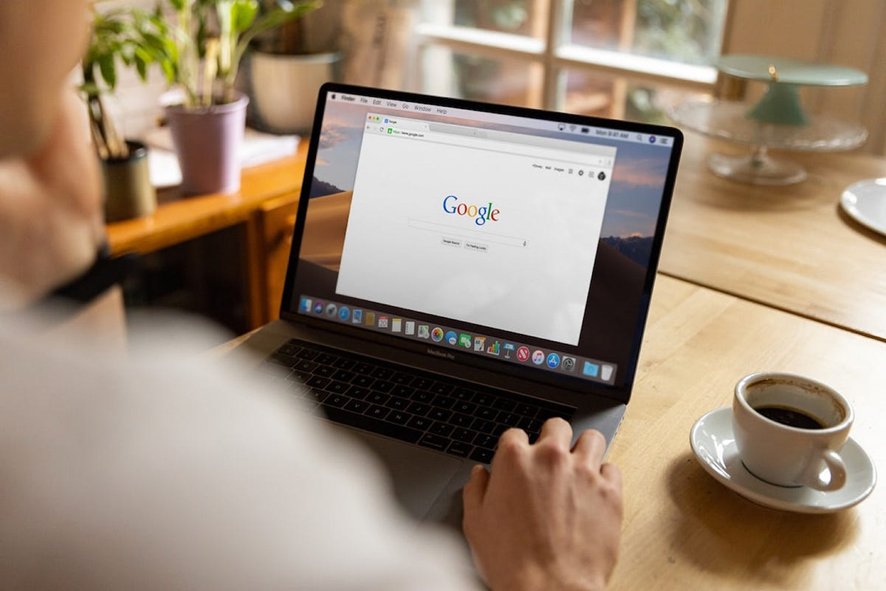

O Google Flights é uma plataforma online fornecida pelo Google que permite aos usuários pesquisarem e compararem voos de várias companhias aéreas e agências de viagens. Ele oferece uma interface intuitiva e fácil de usar, ajudando os usuários a encontrarem opções de voos com base em suas preferências e necessidades.

Uma das principais vantagens do site de busca é sua capacidade de fornecer informações em tempo real sobre os preços dos voos. Os usuários podem visualizar gráficos interativos que mostram a flutuação de preços ao longo do tempo, permitindo que eles identifiquem períodos mais econômicos para viajar.

Em resumo é uma excelente plataforma para realizar buscas por passagens baratas.

##Web Scraping

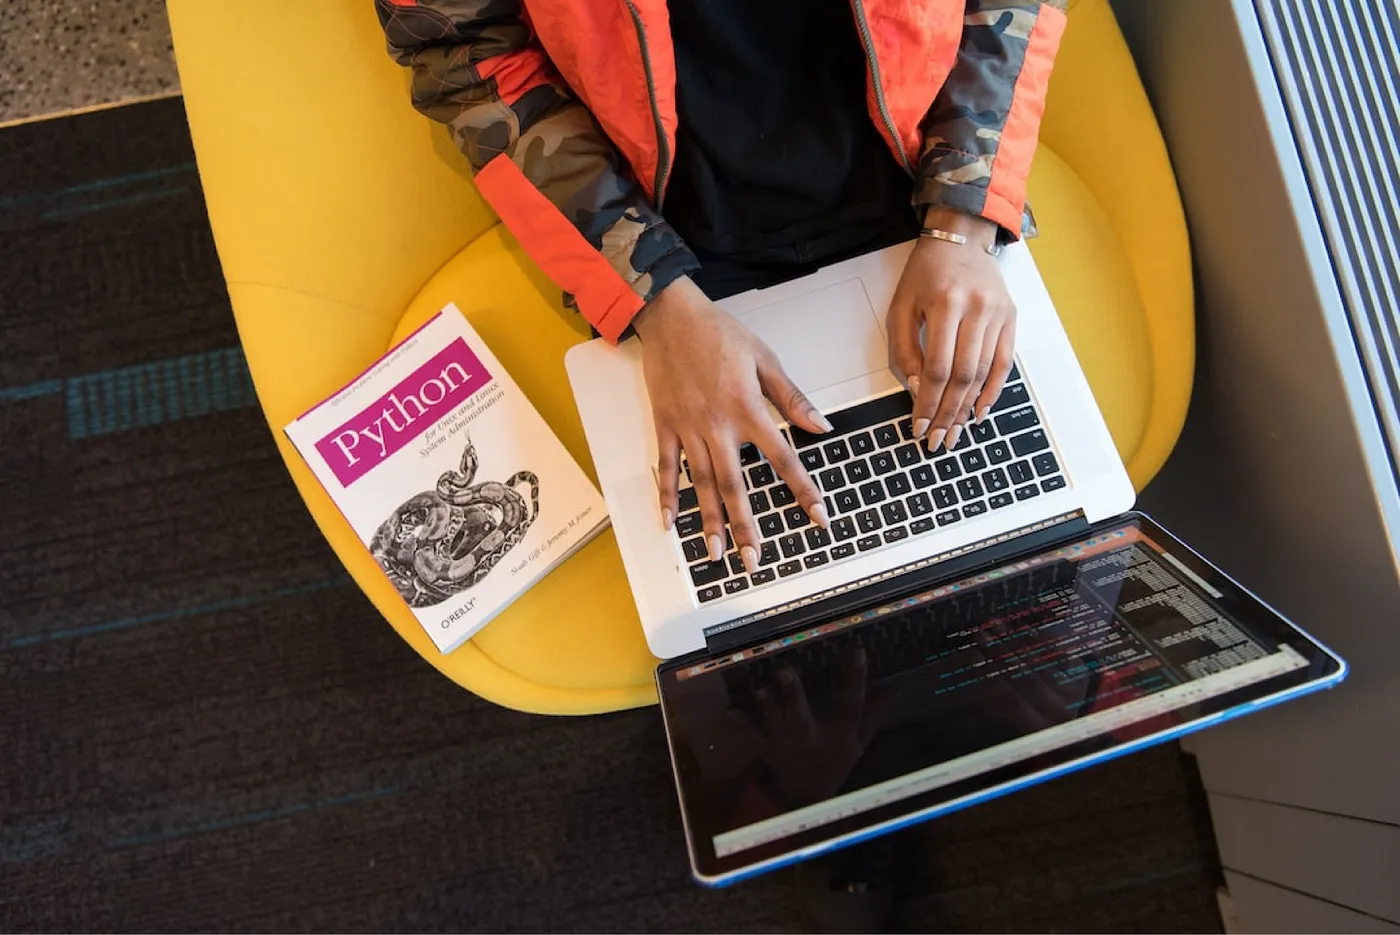

A arquitetura do Web Scraping refere-se à estrutura e aos componentes envolvidos no processo de extração automatizada de dados de páginas da web. Embora a arquitetura possa variar dependendo da abordagem e das ferramentas utilizadas, geralmente envolve os seguintes elementos principais:

Fonte de dados: É o site ou página web de onde os dados serão extraídos.
Coletor (Crawler): O coletor é responsável por acessar e navegar pelas páginas web para obter os dados desejados.
Analisador (Parser): O analisador é responsável por extrair os dados relevantes do conteúdo HTML das páginas web.
Processamento e Armazenamento de Dados: Após a extração dos dados, eles podem ser processados e limpos para garantir a qualidade e a consistência.
Programa de controle: O programa de controle é a parte central da arquitetura, responsável por coordenar as etapas do Web Scraping. Ele define as regras e configurações do scraping, gerencia o fluxo do coletor e analisador, executa a extração periódica dos dados e controla o armazenamento ou processamento dos dados extraídos.
Interface de Saída: A interface de saída pode ser um painel de controle, um aplicativo, um relatório ou qualquer outro meio para exibir ou utilizar os dados extraídos.
Let’s code!
Após entender a estrutura do Web Scraping o próximo passo será a construção de um script capaz de buscar preços de uma determinada passagem aérea.

A construção do código será em Python, a fonte de dados será o Google Flights, e como coletor, utilizarei a biblioteca Selenium.

In [ ]:
#Importando bibliotecas
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver
from time import sleep

Agora através do selenium, serão criadas funções que analisam os dados HTML da página e que extraem as informações mais relevantes.

In [ ]:
#Função para achar elementos na página
def find(driver,css):
    return driver.find_elements(By.CSS_SELECTOR, css)

#Função para preencher os campos
def write(element,text):
    element.send_keys(Keys.CONTROL, 'A')
    element.send_keys(text)
    sleep(1)

Adicionei duas funções para auxiliar no processo de navegação da página e obtenção de dados.

In [ ]:
#Função para clicar em elementos da página
def click(driver,css):
    driver.find_element(By.CSS_SELECTOR, css).click()
    sleep(1)

#função para aguardar os elementos aparacerem na tela
def wait(driver,css):
    while len(driver.find_elements(By.CSS_SELECTOR, css)) <1:
        sleep(0.3)

Perceba que as funções foram criadas utilizando analisadores que identificam os elementos pelo código CSS.

O CSS é a sigla para Cascading Style Sheets, ou seja, Folhas de Estilo em Cascatas. É uma maneira de dar estilo ao código criado por linguagens como HTML, XML ou XHTML, por exemplo. De forma prática, ela funciona como uma camada de personalização ao conteúdo visível e podem ser verificadas inspecionando uma página web.

Uma página pode ser inspecionada pelo seguinte atalho:

Ctrl+Shift+C (Windows, Linux) ou Command+Shift+C (macOS)

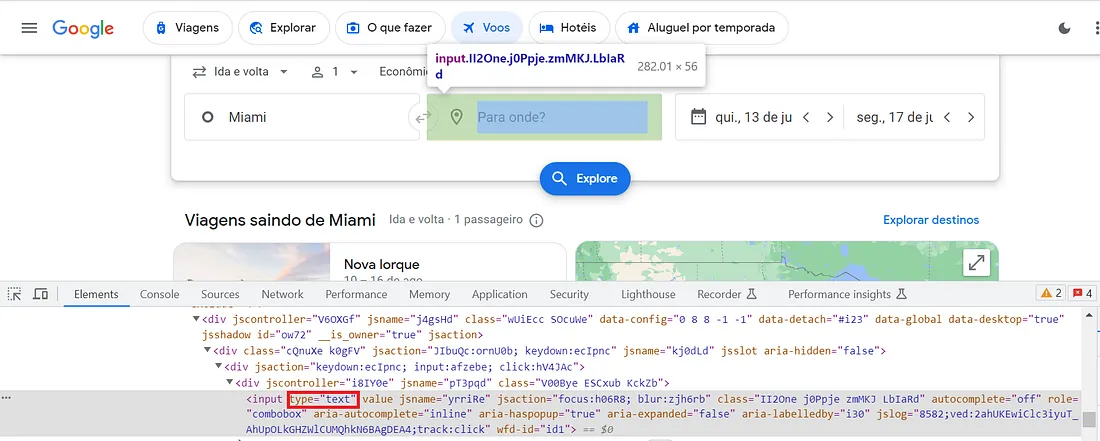

Definido as funções iniciais, basta criar o programa de controle, que consiste em preencher os campos do Google Flights e salvar as informações pertinentes.

In [ ]:
#Programa de Controle de busca de passagens
def google_scrapy(dep, arr, dep_dt, arr_dt):
    #Abrir Chrome Browser e Google Flights
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome('chromedriver', chrome_options=options)
    driver.get('https://www.google.com/flights?hl=pt&curr=BRL#flt=')

    #Aguardar abetura da página
    wait(driver,'[type="text"]')

    #Identificar o elemento correspondente aos campos a serem preenchidos
    inputs = find(driver, '[type="text"]')

    #Decolagem
    departure = inputs[0]
    write(departure, dep)
    click(driver,'[class="P1pPOe"]')

    #Retorno
    arrival = inputs[2]
    write(arrival,arr)
    click(driver,'[class="P1pPOe"]')

    #Data da Decolagem
    date_dep = inputs[4]
    write(date_dep, dep_dt)

    #Data do Retorno
    date_arr = inputs[5]
    write(date_arr, arr_dt)

    #Inciar pesquisa
    click(driver,'[aria-label="Pesquisar"]')

    #Aguardar processo
    wait(driver,'[class="JMc5Xc"]')

Com o código acima todos os campos seriam preenchidos e teríamos o início de uma pesquisa por uma passagem aérea.

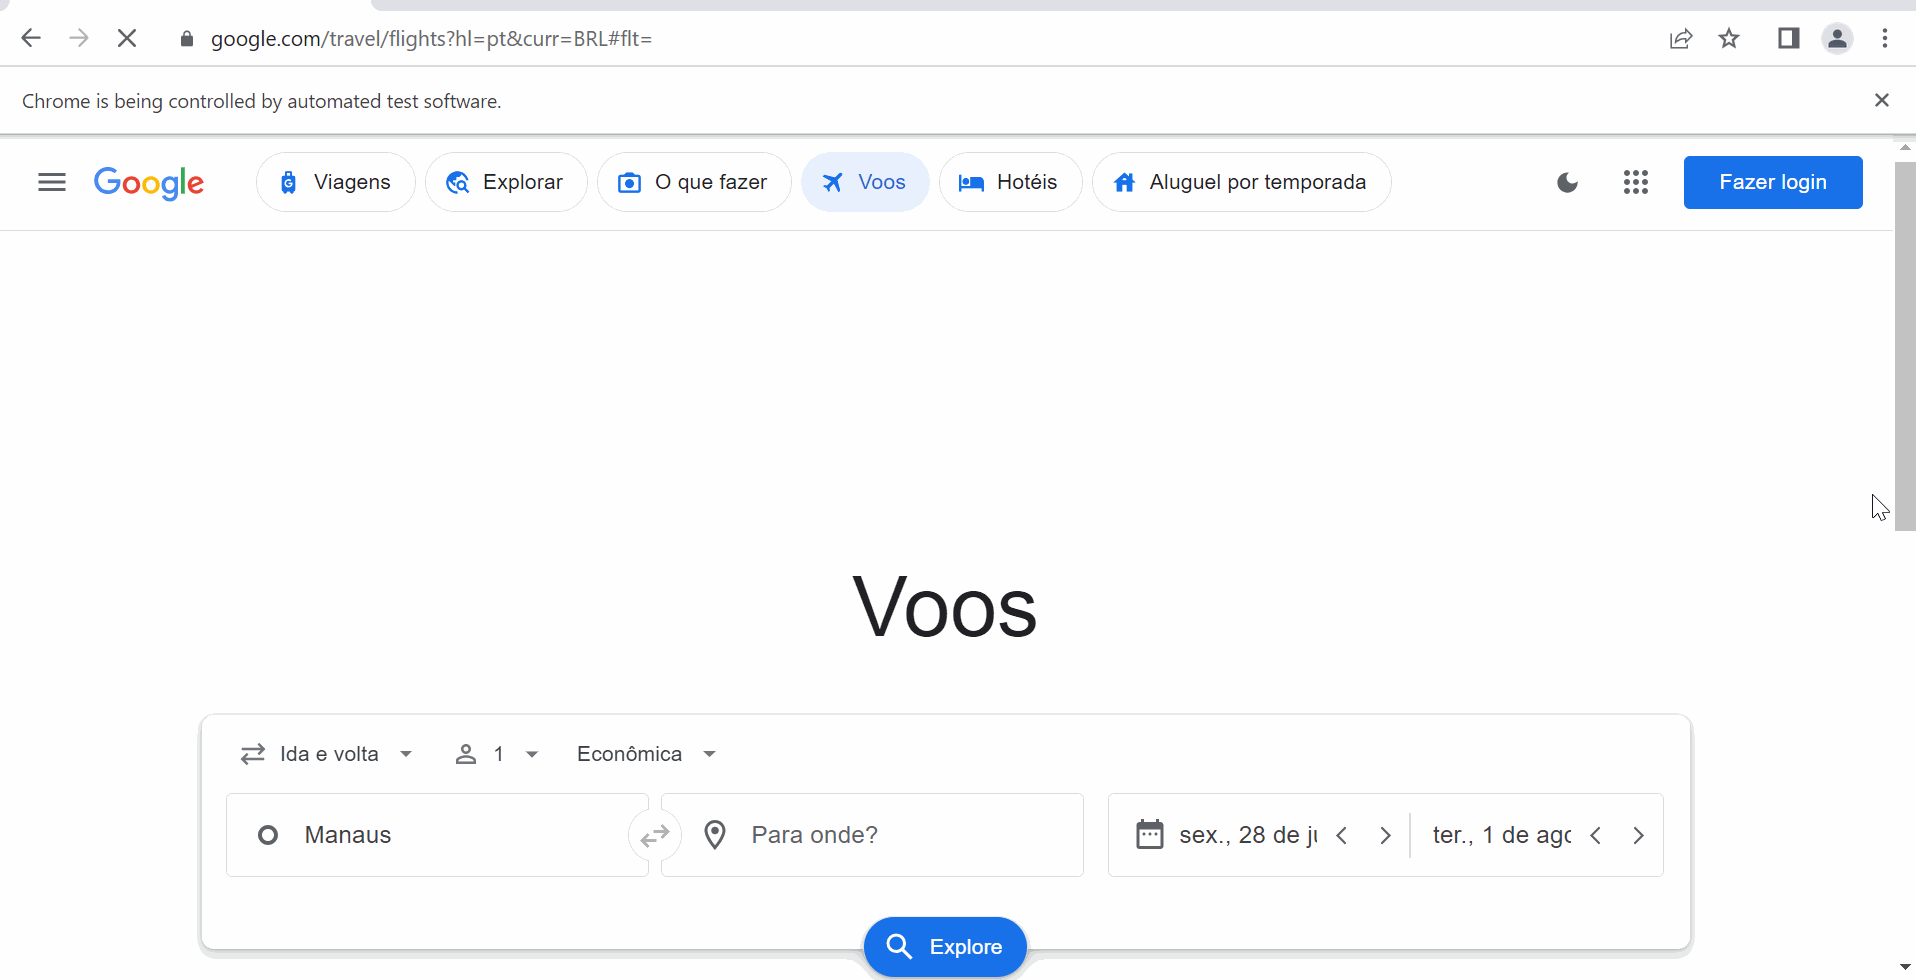

Agora é possível obter a página com os preços das passagens definidas pela busca. Sendo assim, iremos agora coletar as informações da melhor passagem e verificar se o preço é bom.

As informações serão salvas nas variáveis info e add_info.

In [ ]:
 #Armazendo informação da melhor passagem
    info = find(driver, '[class="JMc5Xc"]')[0]
    info = info.get_attribute("aria-label")[:-15]

    #Armazendo informação extra sobre o preço da passagem
    add_info = find(driver,'[class="frOi8 AdWm1c fVSoi"]')[0].text

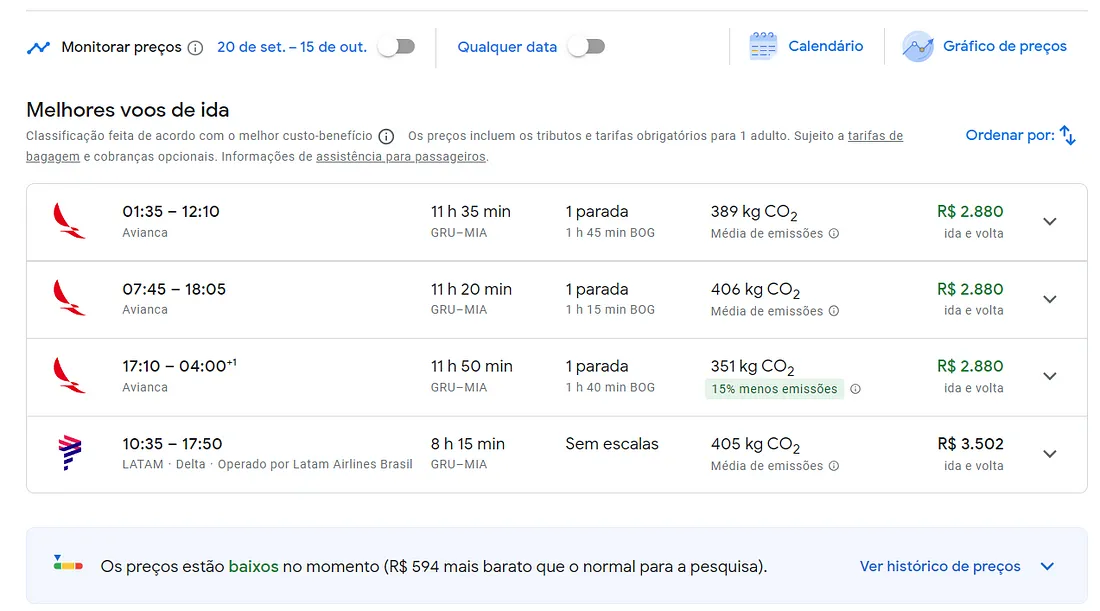

Encontramos uma passagem com um bom preço!

Vamos verificar se existe em um período próximo, alguma passagem ainda melhor, utilizando a opção calendário.

A informação será salva na variável min_price.

In [ ]:
#Procurando por passagens baratas no período próximo
    tickets = [elements.text.split('\n') for elements in find(driver, '[class="mrywM"]')]
    value = tickets[0][15:-15]
    price = [float(v.replace('R$ ',"").replace('.','')) for v in value]
    min_price = min(price)

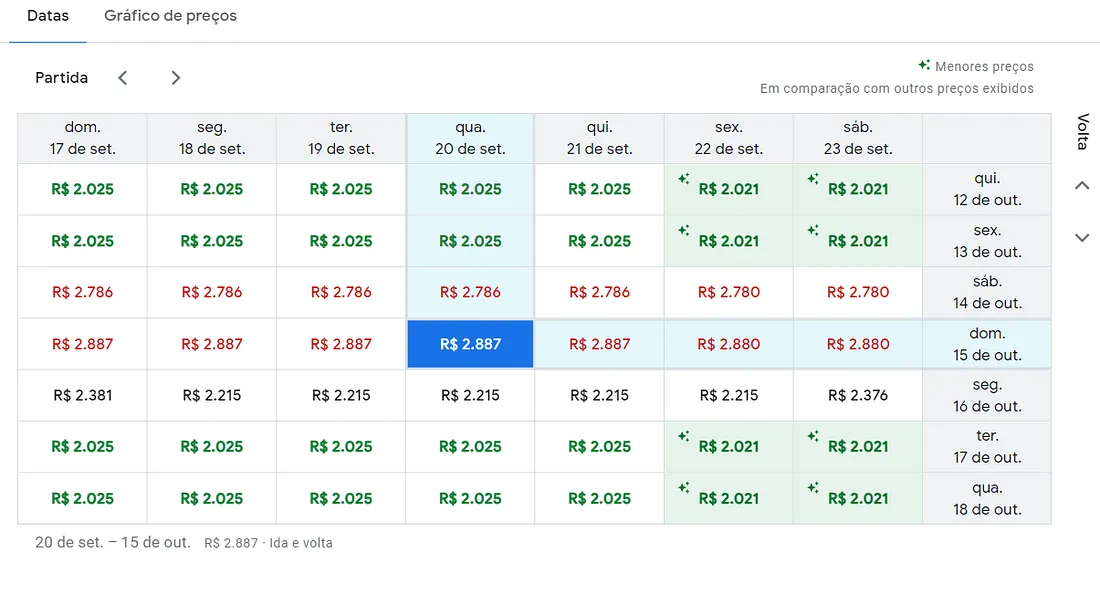

Achamos um preço ainda melhor!!!

Por fim, a Interface de Saída será apenas uma função ‘print()’, revelendo os valores que encontramos e o fim da nossa pesquisa.

In [ ]:
 #Interface de Saída
    print(f'Melhor voo:')
    print(info,'\n')
    print(add_info)
    print(f'\nO menor valor encontrado próximo da data foi de R${min_price}')

    #Fechando o Browser
    driver.quit()

## Resultado

Com o script pronto vamos conferir qual será a melhor passagem para Miami, saindo de Guarulhos-SP no dia 20-09-23, retornando no dia 15–10–2023.

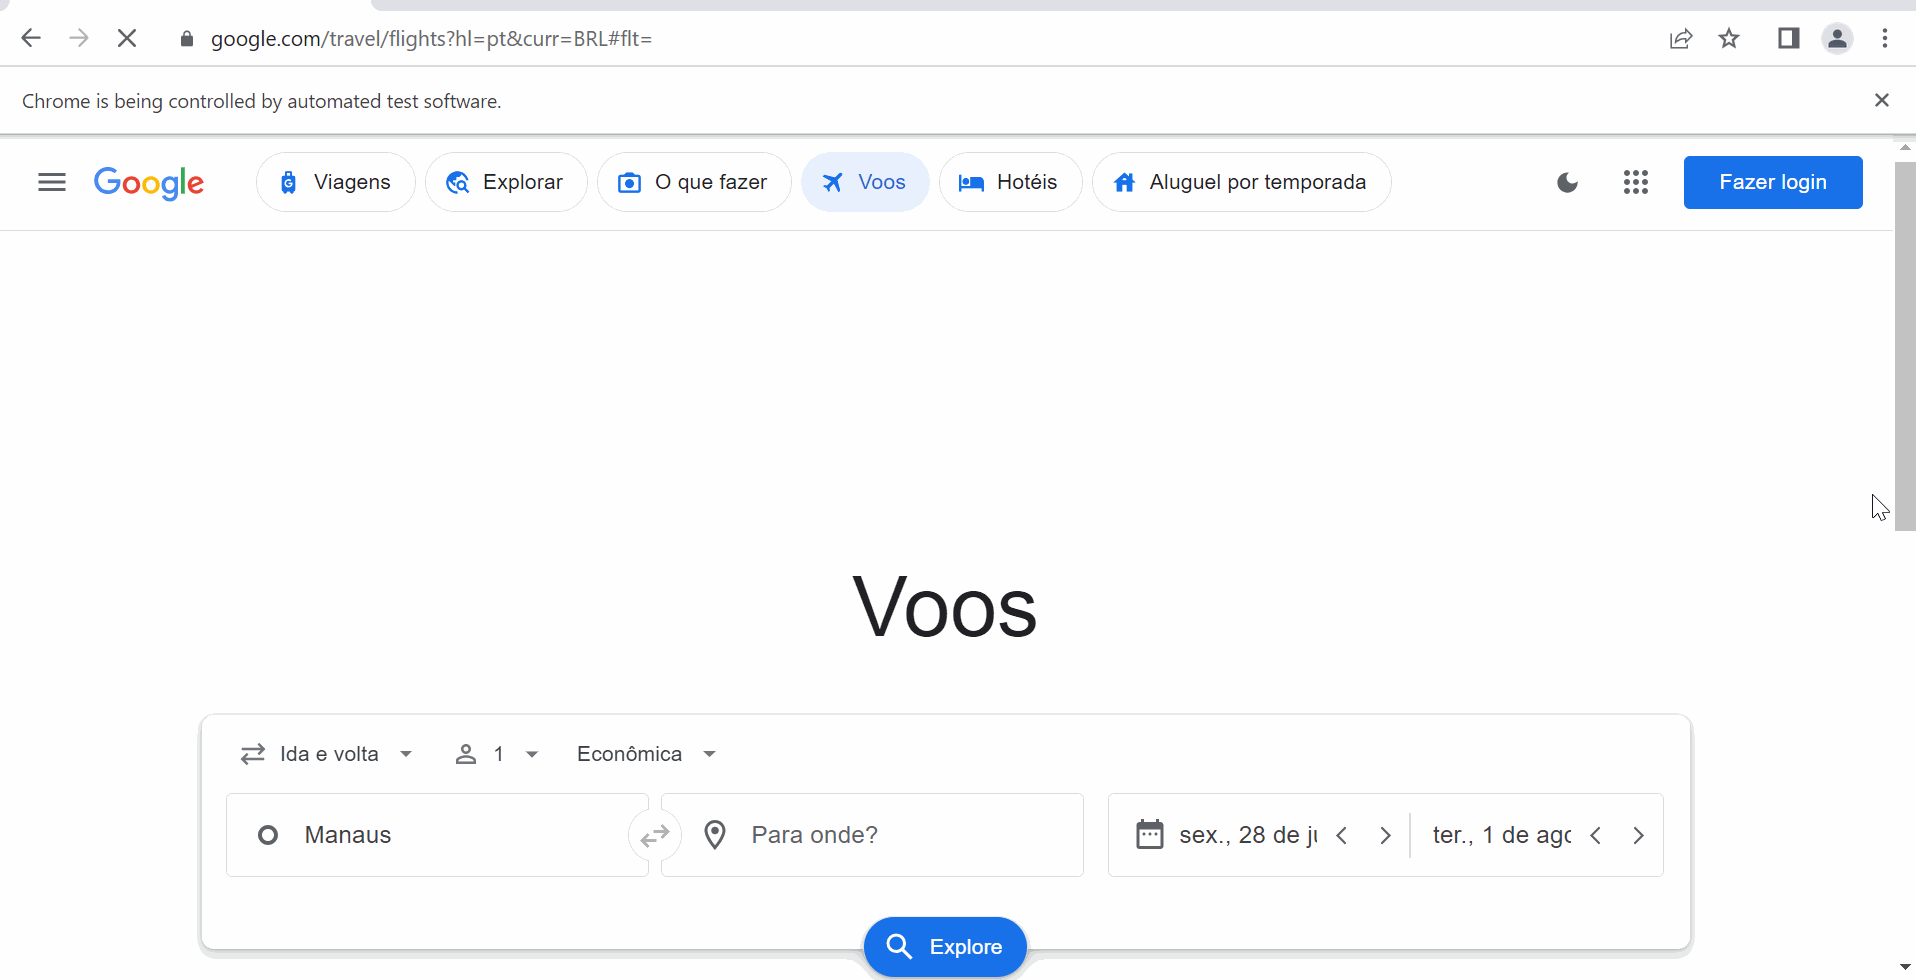

In [ ]:
#Resultado da pesquisa
Melhor voo:
Preço total a partir de 2880 Reais brasileiros, ida e volta. Voo da Avianca com 1 parada. Sai do aeroporto Aeroporto Internacional de Guarulhos (GRU) às
01:35 do dia quarta-feira, setembro 20 e chega no aeroporto Aeroporto Internacional de Miami às 12:10 do dia quarta-feira, setembro 20.
Duração total: 11 h 35 min. Parada (1 de 1) de 1 h 45 min no aeroporto Aeroporto Internacional El Dorado, em Bogotá.

Os preços estão baixos no momento (R$ 596 mais barato que o normal para a pesquisa).

O menor valor encontrado próximo da data foi de R$2021.0

#Conclusão
A combinação Web Scraping e Google Flight é uma ótima oportunidade para economizar na compra de passagens aéreas. Acima pude demonstrar um pouco da funcionalidade do Python e da biblioteca Selenium, a partir de agora será possível construir sua forma personalizada de busca por passagens aéreas.

É importante destacar que a arquitetura do Web Scraping pode variar dependendo das necessidades específicas do projeto e das tecnologias utilizadas. Além disso, é fundamental respeitar as políticas e termos de uso dos sites-alvo, garantindo que seja feito de forma ética e legal.

Espero que as informações tenham sido úteis para você e que te poupe pelo menos alguns centavos na próxima viagem!

Segue o link do Linkedin para demais interações ou dúvidas sobre o assunto, e o Github para quem desejar visualizar os códigos utilizados.

Linkedin: https://www.linkedin.com/in/bruno-brasil-8a34101b6/

Github: https://github.com/brunobf09